Обидина Александра

# Классическое машинное обучение

## Место для импорта библиотек

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Загрузка и предобработка данных

Общая информация:

Вам дана таблица bank_clients_data.csv содержащая данные о клиентах банка.<br>Необходимо решить задачу классификации, покинул клиент банк или нет. <br>
Поля таблицы:

* RowNumber — соответствует номеру записи (строки)
* СustomerId — id клиента;
* Surname — фамилия клиента;
* CreditScore — крдитный рейтиинг клиента, полученный в результате каких-то расчетов внутри банка;
* Geography — местоположение клиента;
* Gender — пол;
* Age — возраст;
* Tenure — количество лет, в течение которых человек является клиентом банка;
* Balance — остаток на счете;
* NumOfProducts — количество продуктов, которые клиент приобрел через банк;
* HasCrCard — есть ли у клиента кредитная карта. 1-да, 0-нет;
* IsActiveMember — активный-1 или нет-2 клиент;
* EstimatedSalary — заработная плата;
* Exited — перестал ли клиент пользоваться услугами банка и в принципе быть его лкиентом. Целевая переменная. Характеризует отток.


In [133]:
data = pd.read_csv('./bank_clients_data.csv')

In [134]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [135]:
# Числовые признаки
num_cols = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary'
]

# Категориальные признаки
cat_cols = [
    'Geography',
    'Gender',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember'
]

feature_cols = num_cols + cat_cols
target_col = 'Exited'

In [136]:
data.info() #в обучающей выборке отсутствуют нулевые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [137]:
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [138]:
#Количество уникальных значений в каждом столбце
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [139]:
#Количество дубликатов строк в датасете
duplicates = data.duplicated().sum()
print(duplicates)

0


In [103]:
#Удаление столбцов с номером записи, id клиента и фамилией - индивидуальными данными
#data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [104]:
numeric_data = data[num_cols]
categorial_data = data[cat_cols]

categorial_data.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1


In [105]:
for col in cat_cols:
  print(col + ": ")
  print(data[col].unique(), len(data[col].unique()))

Geography: 
['France' 'Spain' 'Germany'] 3
Gender: 
['Female' 'Male'] 2
NumOfProducts: 
[1 3 2 4] 4
HasCrCard: 
[1 0] 2
IsActiveMember: 
[1 0] 2


## 1. EDA. Составьте Общее представление о данных

#### 1. Прочитайте таблицу и выведите информацию о каждом столбце (среднее значение, среднее отклонение, основные процентили итп)

In [106]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### 2. Чему равен 80% процентиль по полю зарплаты, результат округлите до 1 знака после запятой, о чём говорит данное значение?

In [107]:
data['EstimatedSalary'].describe(percentiles=[0.8])
# 80% процентиль (значение, ниже которого находится 80% всех наблюдений в наборе данных) равен 159836.7,
# это говорит о том, что 80% клиентов зарабатывают меньше 159836.7, а 20% - больше.

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
50%,100193.915000
80%,159836.726000
max,199992.480000


#### 3. Есть ли в данных пропущенные значения?

In [108]:
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


В данных нет пропущенных значений.

#### 4. Проверьте сбалансированность классов и сделайте вывод


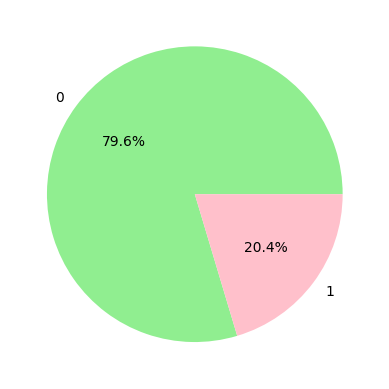

In [109]:
plt.pie(data[target_col].value_counts(), labels=list(data[target_col].value_counts().index),
        autopct='%1.1f%%', colors = ['lightgreen', 'pink'])
plt.show()

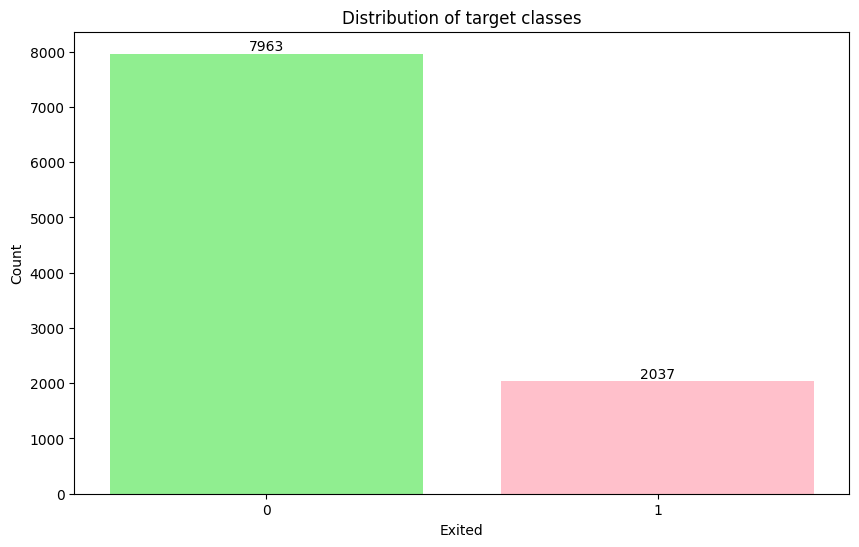

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(data[target_col].value_counts().index, data[target_col].value_counts(), color=['lightgreen', 'pink'])

plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of target classes')

for i, value_count in enumerate(data[target_col].value_counts()):
    plt.text(i, value_count, str(value_count), ha='center', va='bottom')

plt.xticks(
    ticks=data[target_col].value_counts().index,
    labels=data[target_col].value_counts().index
)
plt.show()

1. 7963 (79.6%) наблюдений относятся к нулевому классу
2. 2037 (20.4%) наблюдений относятся к единичному классу

То есть, наблюдается дисбаланс классов, данные распределены примерно 4 к 1.

## 2. Построение графиков

#### 1. Постройте гистограмму распределения возраста клиентов, сделайте ее зеленого цвета, не забудьте про наименования осей и самого графика

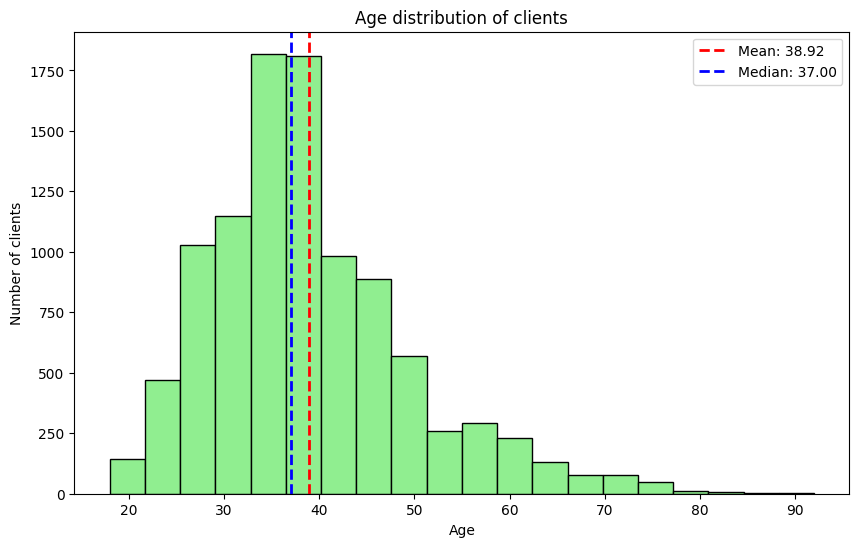

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='lightgreen', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Number of clients')
plt.title('Age distribution of clients')

mean_value = data['Age'].mean()
median_value = data['Age'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

plt.legend()
plt.show()

#### 2. Постройте график распределения количества ушедших клиентов исходя из их пола. Наверху каждого столбца отобразите количественный показатель. Какой можно сделать вывод?

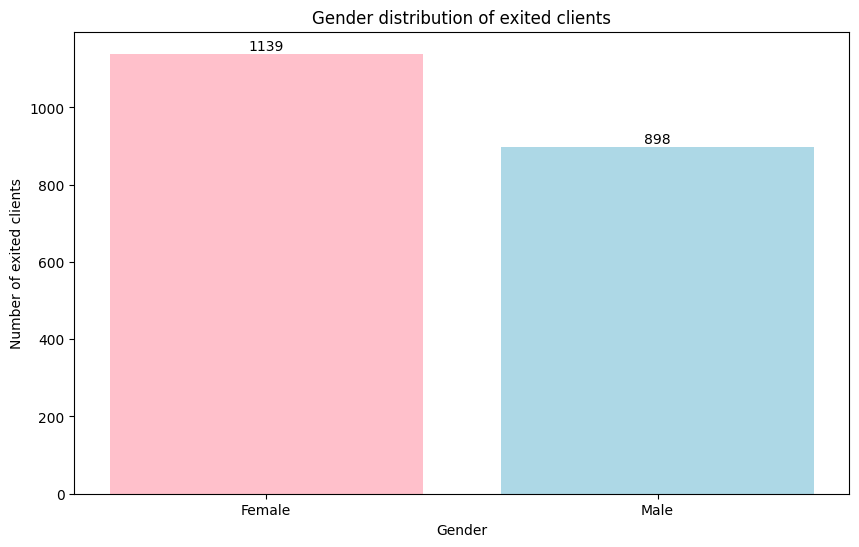

In [68]:
exit_counts = data[data['Exited'] == 1]['Gender'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(exit_counts.index, exit_counts.values, color=['pink', 'lightblue'])
plt.xlabel('Gender')
plt.ylabel('Number of exited clients')
plt.title('Gender distribution of exited clients')

for i, value_count in enumerate(exit_counts):
    plt.text(i, value_count, str(value_count), ha='center', va='bottom')

In [ ]:
#Вывод: Ушедших клиентов женского пола больше, чем мужского (отношение примерно 5 к 4).

#### 3. Возьмите данные о географии клиентов и их доходах. Постройте круговую диаграмму, отображающую картину среднего заработка по странам (должны быть видны страны и конкретные числовые значения)

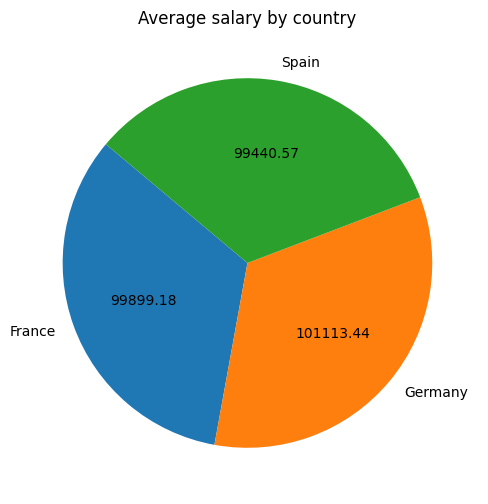

In [69]:
avg_salary_by_country = data.groupby('Geography')['EstimatedSalary'].mean()

plt.figure(figsize=(10, 6))
plt.pie(avg_salary_by_country, labels=avg_salary_by_country.index, autopct=lambda p: f'{p * sum(avg_salary_by_country) / 100:.2f}', startangle=140)

plt.title('Average salary by country')
plt.show()

#### 4. Постройте тепловую карту корреляции всех признаков из таблицы. Согласно полученной карте, какие признаки показывают наибольшую взаимосвязь?

In [71]:
data_corr = data.copy()

#Удаление столбцов с номером записи, id клиента и фамилией - индивидуальными данными
data_corr.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

le = LabelEncoder()
for col in cat_cols:
        data_corr[col] = le.fit_transform(data_corr[col])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'CreditScore'),
  Text(1.5, 0, 'Geography'),
  Text(2.5, 0, 'Gender'),
  Text(3.5, 0, 'Age'),
  Text(4.5, 0, 'Tenure'),
  Text(5.5, 0, 'Balance'),
  Text(6.5, 0, 'NumOfProducts'),
  Text(7.5, 0, 'HasCrCard'),
  Text(8.5, 0, 'IsActiveMember'),
  Text(9.5, 0, 'EstimatedSalary'),
  Text(10.5, 0, 'Exited')])

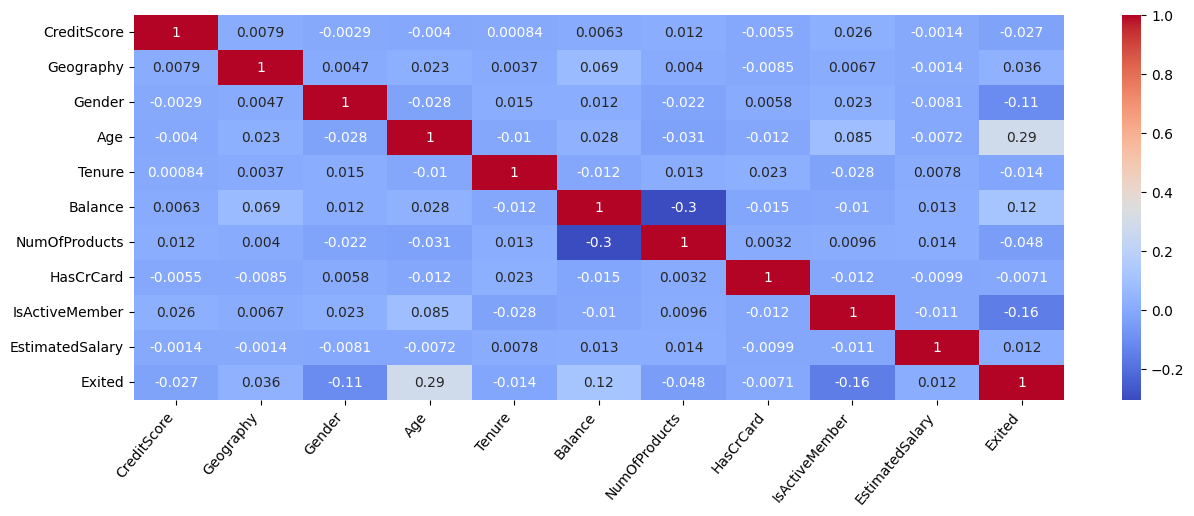

In [72]:
plt.figure(figsize=(15, 5))
sns.heatmap(data_corr.corr(), cmap = 'coolwarm', annot=True)
plt.xticks(rotation=50, ha='right')

Признаки Gender, Age, Balance, IsActiveMember больше остальных коррелируют с целевой переменной Exited.

Наиболее сильно коррелируют признаки Balance и NumOfProducts.

## 3. Подготовка данных к использованию в алгоритмах ml

####  1. Избавьтесь от полей, которые по вашему мнению являются неинформативными, поясните выбор

In [140]:
#Удаляем столбцы с номером записи, id клиента и фамилией, так как это индивидуальные данные клиента
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

#### 2. Переведите категориальные данные в числовые.

In [202]:
le_ = LabelEncoder()
for col in cat_cols:
        data[col] = le_.fit_transform(data[col])

In [142]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,0,1,1,101348.88,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1
3,699,0,0,39,1,0.00,1,0,0,93826.63,0
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0


#### 3. Разделите данные на train (80%) и test (20%) любым способом

1. Для задачи линейной регрессии, целевой признак Age<br> Получите датасеты:
X_reg_train, X_reg_test, y_reg_train, y_reg_test

2. Для задачи логистической регрессии. Целевой признак Exited<br> Получите датасеты:
X_cl_train, X_cl_test, y_cl_train, y_cl_test

In [237]:
X_reg = data.drop(columns=['Age'])
y_reg = data['Age']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, train_size=0.8, random_state=42)

In [259]:
X_cl = data.drop(columns=['Exited'])
y_cl = data['Exited']
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, train_size=0.8, stratify=y_cl, random_state=42)

#### 4. Стандартизируйте данные для классификации или регрессии, если это необходимо.

In [149]:
#Уберем 'Age' из числовых признаков, так как теперь это таргет
num_cols_reg = [
    'CreditScore',
    'Tenure',
    'Balance',
    'EstimatedSalary'
]

In [244]:
scaler = StandardScaler()
for col in num_cols_reg:
    X_reg_train[col] = scaler.fit_transform(X_reg_train[[col]])
    X_reg_test[col] = scaler.transform(X_reg_test[[col]])

In [260]:
scaler_ = StandardScaler()
for col in num_cols:
    X_cl_train[col] = scaler_.fit_transform(X_cl_train[[col]])
    X_cl_test[col] = scaler_.transform(X_cl_test[[col]])

Oversampling объектов 1го класса с помощью SMOTE:

In [261]:
from imblearn.over_sampling import SMOTE
from collections import Counter

over = SMOTE(sampling_strategy = 1)

cols = X_cl_train.values
target = y_cl_train.values

cols, target = over.fit_resample(cols, target)

Counter(target)

Counter({1: 6370, 0: 6370})

In [263]:
test_cols = X_cl_test.values
test_target = y_cl_test.values

test_cols, test_target = over.fit_resample(test_cols, test_target)

Counter(test_target)

Counter({0: 1593, 1: 1593})

## 4. Работа с ml моделями

#### 1. Реализуйте модель линейной регрессии для поля 'Age' аналитическим способом, используя формулу весов, полученную от минимизации ошибок по методу наименьших квадратов.

$ w = (X^TX)^{-1}X^TY $

In [ ]:
# Создайте функцию, которая принимает значения выборок, полученных выше (X_reg_train, X_reg_test, y_reg_train, y_reg_test) и
# выдаёт среднюю абсолютную ошибку и корень из среднеквадратичной ошибки по тестовой выборке

# def lin_reg_1 (X_tr, y_tr, X_te, y_te):
#     return mae, mse


In [152]:
def lin_reg_1 (X_tr, y_tr, X_te, y_te):
    w_star = np.linalg.inv(X_tr.T.dot(X_tr)).dot(X_tr.T).dot(y_tr)
    y_pred = X_te.dot(w_star)
    mae = mean_absolute_error(y_te, y_pred)
    mse = mean_squared_error(y_te, y_pred)

    return mae, mse

#### 2. Реализуйте модель линейной регрессии при помощи любого готового пакета, сравните полученное mae из двух моделей, из этого решения и полученного выше. Сделайте выводы.

In [239]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)
y_reg_pred = lr.predict(X_reg_test)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"MAE готовой модели: {mae}")
print(f"MSE готовой модели: {mse}")

MAE готовой модели: 7.2531497397592535
MSE готовой модели: 96.64843249629746


In [240]:
own_mae, own_mse = lin_reg_1(X_reg_train, y_reg_train, X_reg_test, y_reg_test)

print(f"MAE собственной модели: {own_mae}")
print(f"MSE собственной модели: {own_mse}")

MAE собственной модели: 8.279453714467875
MSE собственной модели: 118.09691535728714


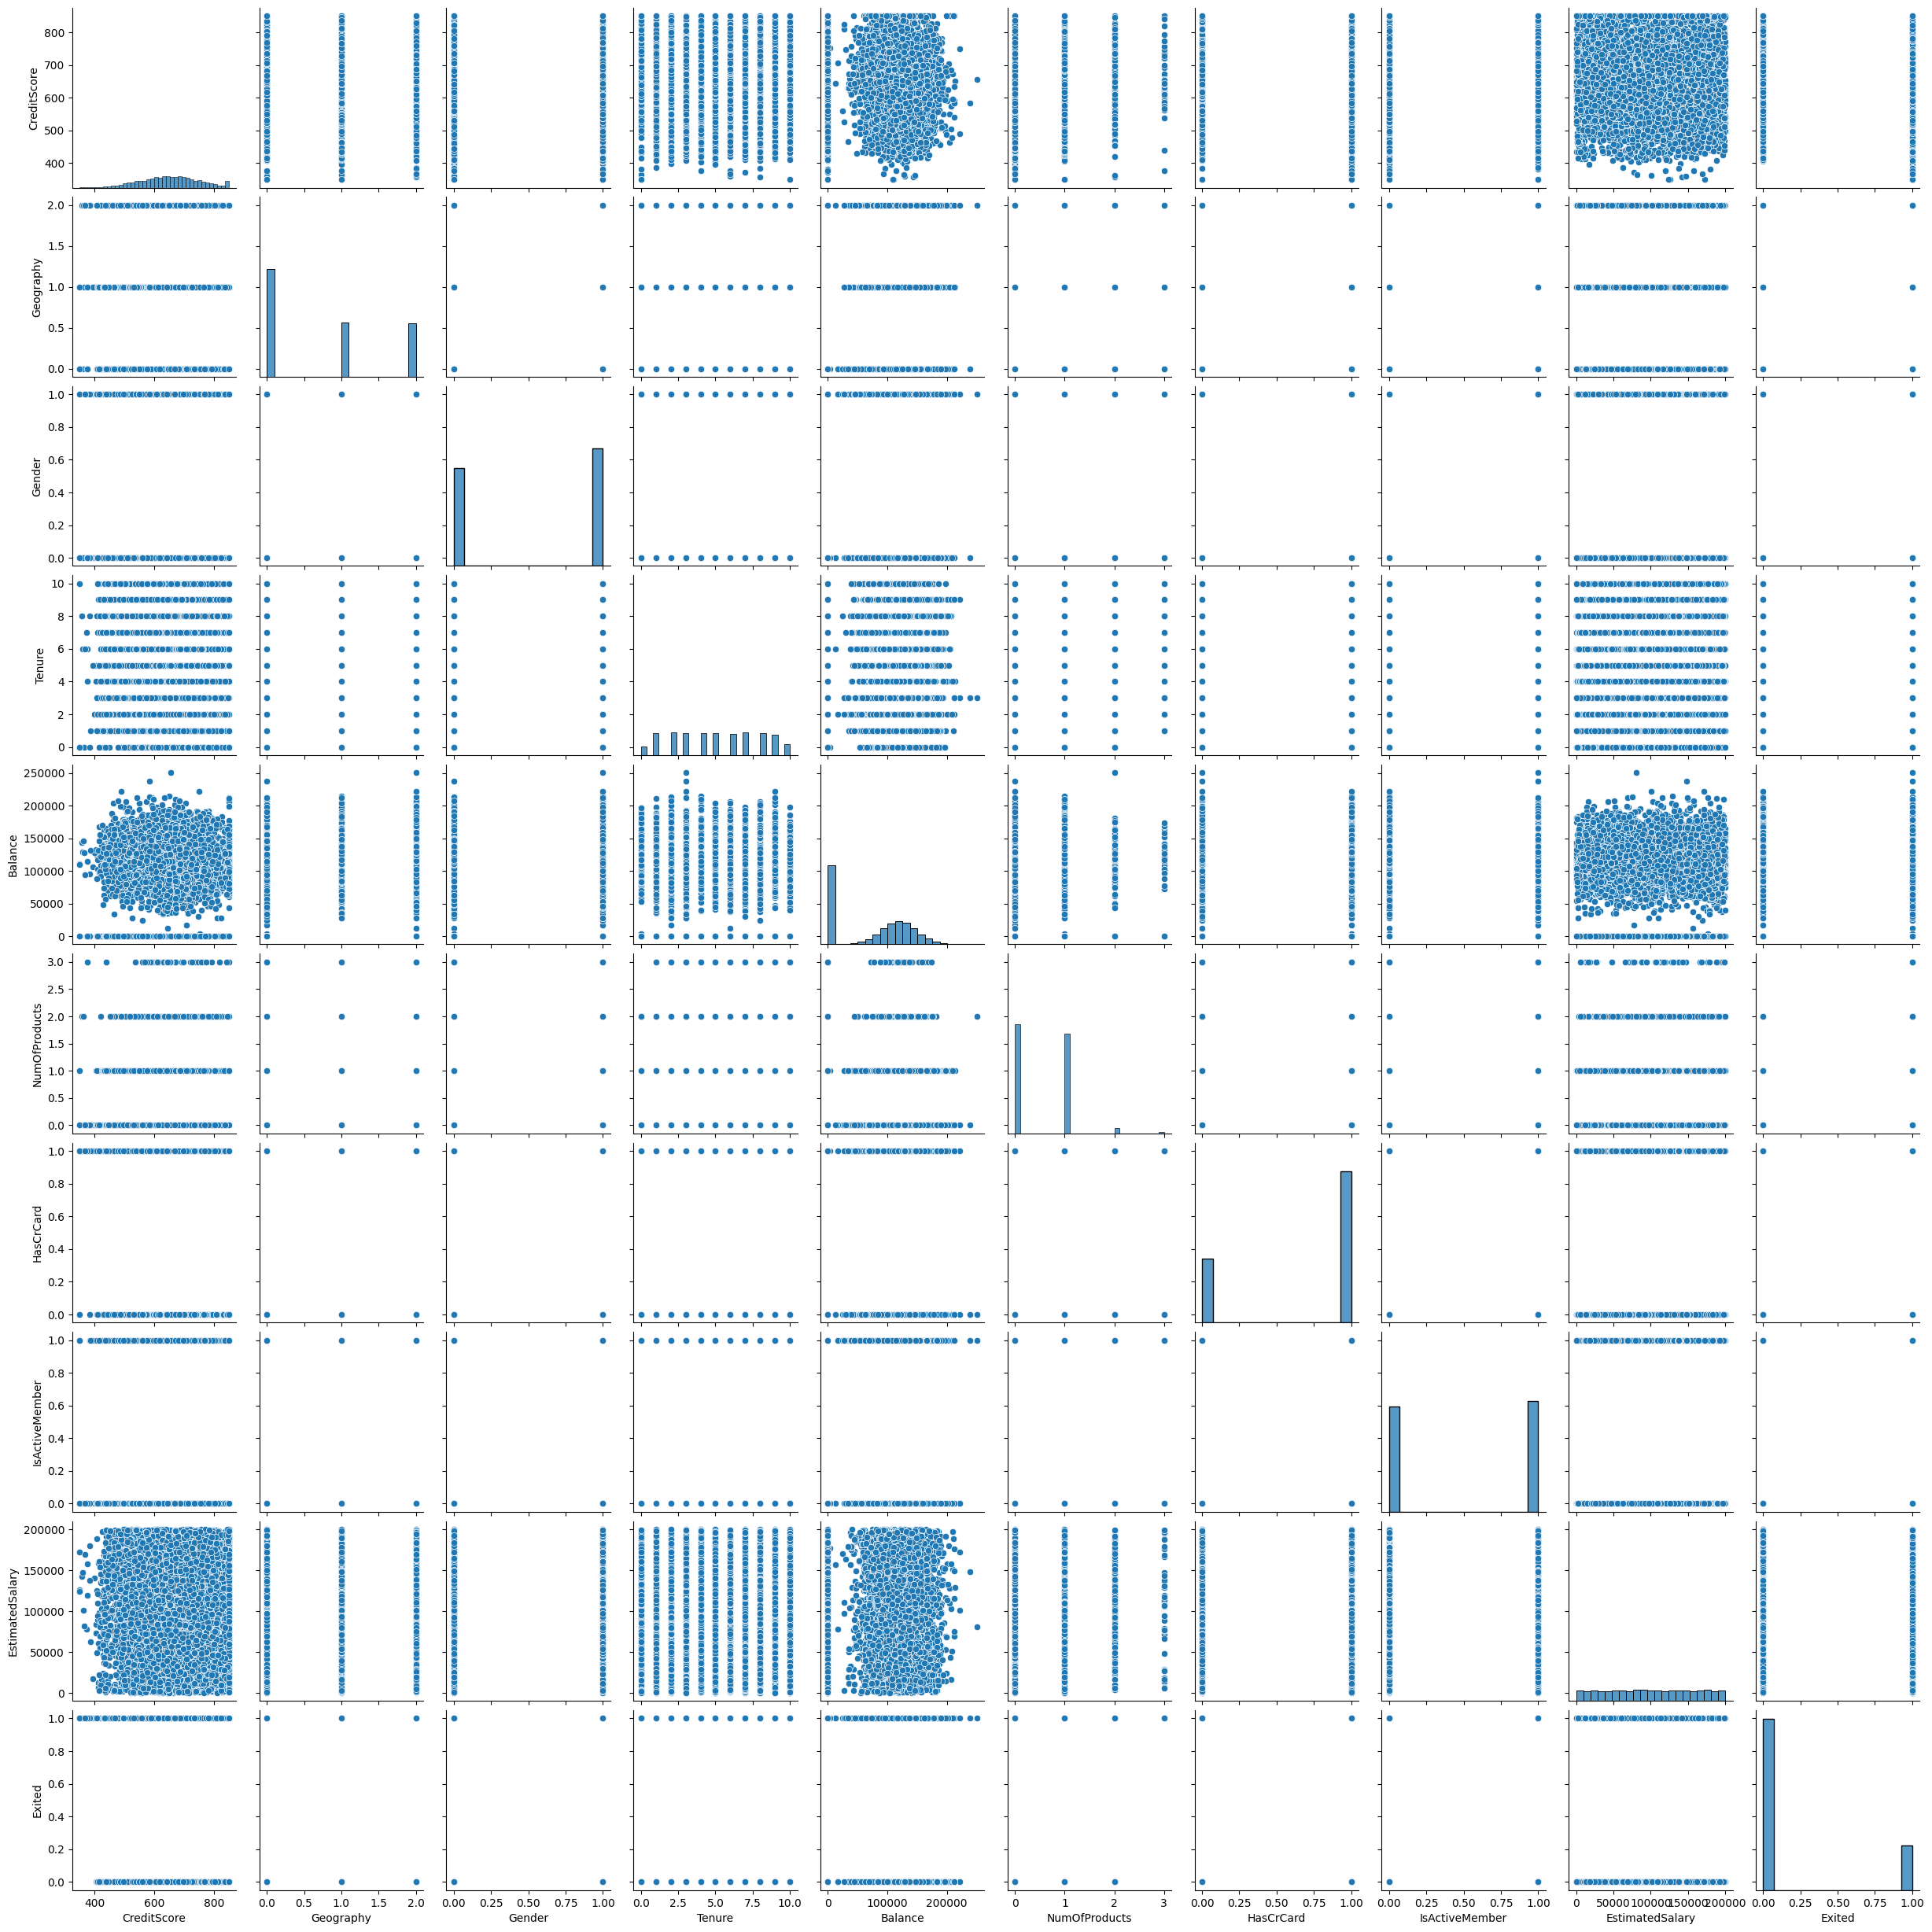

In [162]:
sns.pairplot(X_reg_train)

Результаты получились плохие, так как через объекты нельзя провести линейную функцию (видно из парных графиков). То есть связь между объектами и целевой переменной Age нельзя аппроксимировать линейным палиндромом.

По распределению признаков видно, что данные из предложенного набора подходят для решения задачи классификации.

#### 3. Реализуйте модель логистической регрессии для поля 'Exited'

1. Напишите функцию активации, которую в дальнейшем будете использовать. <br>
$y_{pred}(y') = \frac{1}{1 + e^{-\langle y' \rangle}}
$

In [207]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

2. Напишите функцию кроссэнтропии, проверьте работает ли она, функция не должна ничего возвращать, дальше понадобится только тело функции <br>
$L(w) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})$

In [168]:
def cross_entropy(y, y_pred):
    L = - y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
    loss = np.mean(L)
    print(loss)

In [170]:
y = np.array([1, 0, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.2])
cross_entropy(y, y_pred)

0.164252033486018


3. Дополните архитектуру логистической регрессии. Обучите и предскажите результаты по тестовой выборки ранее полученных данных для классификации. (X_cl_train, X_cl_test, y_cl_train, y_cl_test). <br>
Выведите classification_report из пакета sklearn. Получите weighted avg >= 0.68 по каждой метрике из отчёта

In [273]:
class Hand_made_Logistic_reg:

    #Здесь ваша функция сигмоиды
    def sigmoid(self, h):
        return 1 / (1 + np.exp(-h))


    def loss_function(self, X, y, weights):
        # если смотреть на функцию потерь, то y_pred в ней это:
        y_hat = self.sigmoid(np.dot(X, weights))

        #здесь описывается функция потерь - кросс энтропия
        # вставьте своё созданное выше выражение в скобки
        return np.mean(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) #((не забудьте self рядом с функциями, которые определены внутри класса))


    def fit(self, X, y, epochs=13000, lr=0.01):
        loss = []

        weights = np.random.rand(X.shape[1])
        N = X.shape[0] #кол-во cтрочек в датасете

        for epoch in range(epochs):
            # Градиентный спуск:
            y_hat = self.sigmoid(np.dot(X, weights))
            #epsilon = 1e-15
            #y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

            #Здесь функция обновления весов
            gradient = np.dot(X.T, (y_hat - y)) / N
            #Запишите функцию обновления весов на каждом шаге, здесь пригодится lr и N
            weights -= lr * gradient

            #Запись ошибок в список
            loss.append(self.loss_function(X, y, weights))

            #Отображение ошибок по эпохам во время обучения
            print('Эпоха:', epoch, 'Loss:', loss[-1])
        self.weights = weights
        self.loss = loss


    def predict(self, X):
        # скалярное умножение весов и новых значений х
        y_hat = self.sigmoid(np.dot(X, self.weights))
        # возвращение списка значений, которые выше определенного уровня вероятности
        return (y_hat >= 0.5).astype(int)

In [ ]:
# Сlassification_report. Получите weighted avg >= 0.68 каждой метрике из отчёта

In [274]:
from sklearn.metrics import classification_report

model = Hand_made_Logistic_reg()
model.fit(cols, target)

Выходные данные были обрезаны до нескольких последних строк (5000).
Эпоха: 8000 Loss: 0.5855980925776323
Эпоха: 8001 Loss: 0.5855980699737096
Эпоха: 8002 Loss: 0.5855980473892264
Эпоха: 8003 Loss: 0.585598024824166
Эпоха: 8004 Loss: 0.5855980022785114
Эпоха: 8005 Loss: 0.5855979797522463
Эпоха: 8006 Loss: 0.5855979572453535
Эпоха: 8007 Loss: 0.5855979347578165
Эпоха: 8008 Loss: 0.5855979122896185
Эпоха: 8009 Loss: 0.585597889840743
Эпоха: 8010 Loss: 0.585597867411173
Эпоха: 8011 Loss: 0.5855978450008922
Эпоха: 8012 Loss: 0.5855978226098836
Эпоха: 8013 Loss: 0.5855978002381307
Эпоха: 8014 Loss: 0.5855977778856167
Эпоха: 8015 Loss: 0.5855977555523254
Эпоха: 8016 Loss: 0.5855977332382399
Эпоха: 8017 Loss: 0.5855977109433437
Эпоха: 8018 Loss: 0.5855976886676201
Эпоха: 8019 Loss: 0.5855976664110527
Эпоха: 8020 Loss: 0.585597644173625
Эпоха: 8021 Loss: 0.5855976219553205
Эпоха: 8022 Loss: 0.5855975997561224
Эпоха: 8023 Loss: 0.5855975775760144
Эпоха: 8024 Loss: 0.5855975554149799
Эпоха: 8025

In [275]:
y_cl_pred = model.predict(test_cols)
print(classification_report(test_target, y_cl_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1593
           1       0.72      0.70      0.71      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



Такие результаты получились без расширения тестовой выборки:

In [231]:
print(classification_report(y_cl_test, y_cl_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1607
           1       0.38      0.66      0.48       393

    accuracy                           0.73      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.80      0.73      0.75      2000



#### 4. Создайте стэк из 3-х моделей, одна из которых должна быть на оcнове бустинга деревьев, другая использоваться в комплексе с жадным подбором гиперпараметров, третья любая. Также как и выше, предскажите поле "Exited". Выведите classification_report

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report

In [277]:
# Модель на основе бустинга деревьев
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Модель с жадным подбором гиперпараметров
log_reg = LogisticRegression(solver='liblinear')
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Случайный лес
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

stacked_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('logreg', grid_search), ('rf', rf_model)],
    final_estimator=RandomForestClassifier()
)

stacked_model.fit(cols, target)

y_pred = stacked_model.predict(test_cols)
print(classification_report(test_target, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:47:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:47:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1593
           1       0.92      0.82      0.87      1593

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



Результаты получились значительно лучше.